TODO:  
columna tipodepropiedad con principales tipos y otros  
stacked barplot  

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.2f}'.format)

In [31]:
df = pd.read_csv('data/train.csv', index_col=['id'], parse_dates=['fecha'], error_bad_lines=False)
'''
# merge regiones
regiones = pd.read_csv('data/regionesMexico.csv')
df = df.merge(regiones,on='provincia', how='inner')

# merge precio constante
inflacion_mex = pd.read_csv('./data/inflacion_mex.csv',names=['fecha_mes','indice'],parse_dates=['fecha_mes'],dtype={'indice':np.float64})
# Cambio de base al ultimo dato.
infla2019 = inflacion_mex['indice'].tail(1).values[0]
inflacion_mex['indice'] = (inflacion_mex['indice']/infla2019)*100
# Elimino el número de día para poder joinear ambos DF.
inflacion_mex['fecha_mes'] = inflacion_mex['fecha_mes'].dt.to_period('M')
df['fecha_mes']= df['fecha'].dt.to_period('M')
df = df.merge(inflacion_mex,how='inner',on='fecha_mes')
df['precio_constante'] = (df['precio']/df['indice'])*100
'''

"\n# merge regiones\nregiones = pd.read_csv('data/regionesMexico.csv')\ndf = df.merge(regiones,on='provincia', how='inner')\n\n# merge precio constante\ninflacion_mex = pd.read_csv('./data/inflacion_mex.csv',names=['fecha_mes','indice'],parse_dates=['fecha_mes'],dtype={'indice':np.float64})\n# Cambio de base al ultimo dato.\ninfla2019 = inflacion_mex['indice'].tail(1).values[0]\ninflacion_mex['indice'] = (inflacion_mex['indice']/infla2019)*100\n# Elimino el número de día para poder joinear ambos DF.\ninflacion_mex['fecha_mes'] = inflacion_mex['fecha_mes'].dt.to_period('M')\ndf['fecha_mes']= df['fecha'].dt.to_period('M')\ndf = df.merge(inflacion_mex,how='inner',on='fecha_mes')\ndf['precio_constante'] = (df['precio']/df['indice'])*100\n"

In [33]:
df

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,48551.00,nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,53666.00,19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,47835.00,nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,1150000.00
126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,1.00,...,23650.00,19.30,-99.15,2014-03-18,0.00,0.00,0.00,0.00,1.00,1100000.00
139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,nan,3.00,1.00,2.00,...,73510.00,17.14,-96.80,2016-02-23,0.00,0.00,0.00,0.00,0.00,1150000.00
5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.00,4.00,2.00,3.00,...,130510.00,20.67,-87.04,2016-10-20,0.00,0.00,0.00,0.00,0.00,4200000.00
44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.00,2.00,1.00,1.00,...,9010.00,nan,nan,2014-01-06,0.00,0.00,0.00,1.00,1.00,310000.00


In [23]:
df['tipodepropiedad2'] = df.loc[df.tipodepropiedad.isin(['Apartamento', 'Casa en condominio', 'Casa', 'Duplex'])]
len(dfViviendas)

218556

## Estacionalidad: mes / día / año

    año  precio
0  2012   23534
1  2013   30386
2  2014   40442
3  2015   51469
4  2016   94014


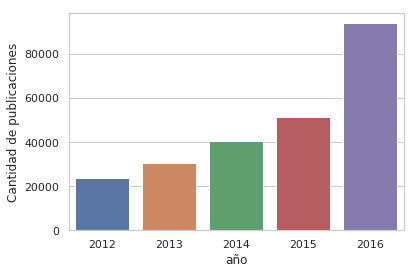

In [6]:
df['año'] = df.fecha.dt.year
df3 = df.groupby(['año'])['precio'].count().to_frame().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="año", y="precio", data=df3)
plt.ylabel('Cantidad de publicaciones')
print(df3)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60],
 <a list of 61 Text xticklabel objects>)

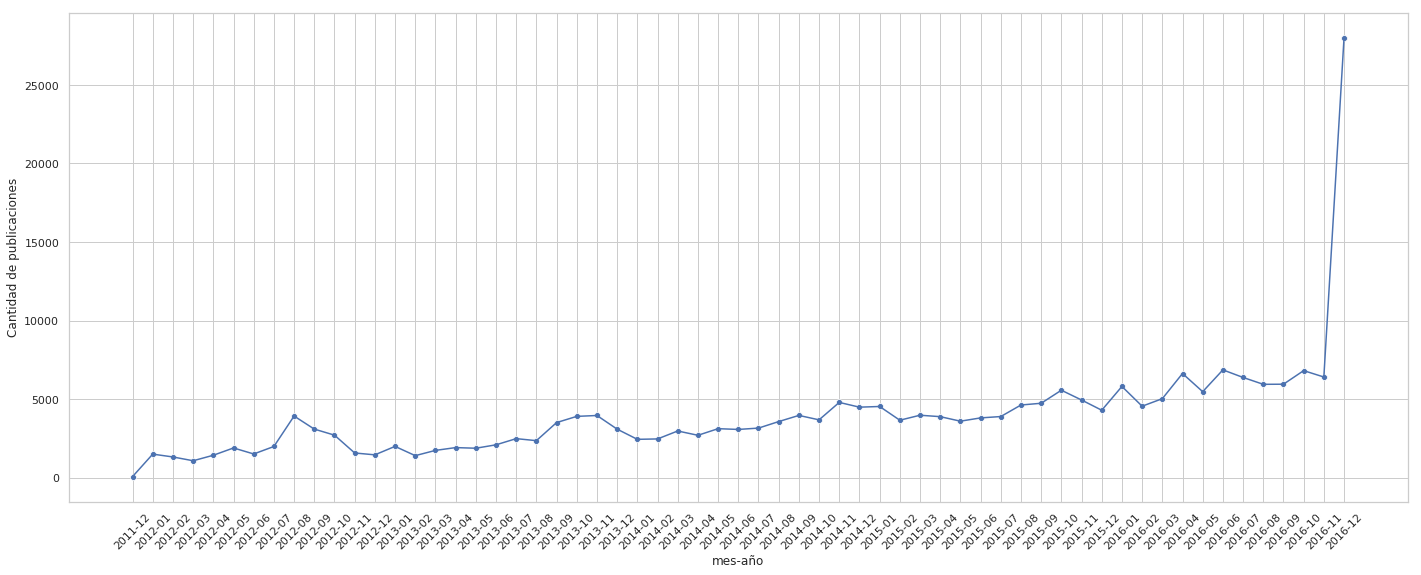

In [6]:
from pandas.tseries.offsets import MonthBegin
df['mes-año'] = (df.fecha - MonthBegin(1)).dt.strftime('%Y-%m')
df3 = df.groupby(['mes-año'])['precio'].count().to_frame().reset_index()
#df3
plt.figure(figsize=(24,9))
sns.set(style="whitegrid")
sns.lineplot(x="mes-año", y="precio", data=df3)
sns.scatterplot(x="mes-año", y="precio", data=df3)
plt.ylabel('Cantidad de publicaciones')
plt.xticks(rotation=45)

Text(0.5,0,'Fecha')

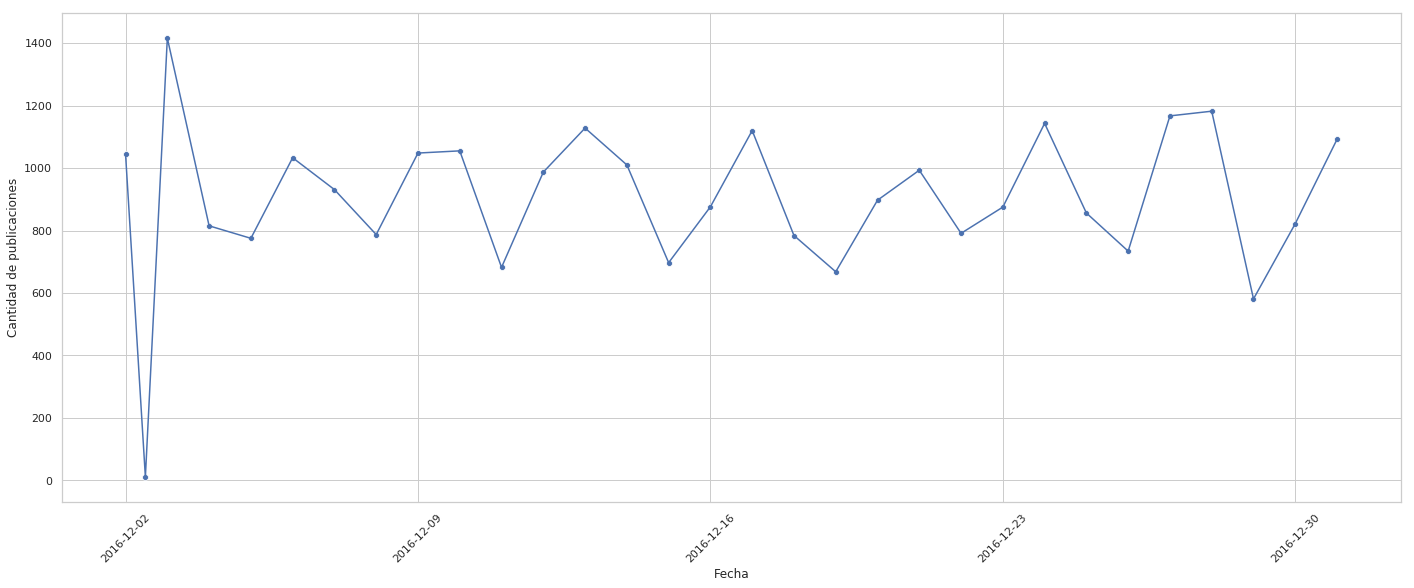

In [13]:
df3 = df.loc[df['mes-año']=='2016-12']
df3 = df3.groupby(['fecha'])['precio'].count().to_frame().reset_index()
#df3
plt.figure(figsize=(24,9))
sns.set(style="whitegrid")
sns.lineplot(x="fecha", y="precio", data=df3)
sns.scatterplot(x="fecha", y="precio", data=df3)
plt.ylabel('Cantidad de publicaciones')
plt.xticks(rotation=45)
plt.xlabel('Fecha')

Text(0,0.5,'Cantidad de publicaciones')

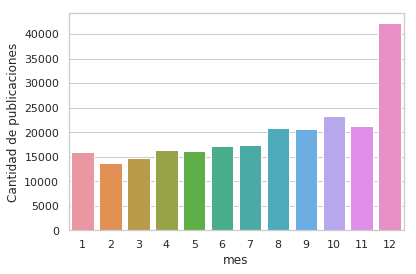

In [9]:
df['mes'] = df.fecha.dt.month
df3 = df.groupby(['mes'])['precio'].count().to_frame().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="mes", y="precio", data=df3)
plt.ylabel('Cantidad de publicaciones')

In [12]:
df.loc[df.mes!=12].count()
197637/11

17967.0

([<matplotlib.axis.XTick at 0x7f22275c31d0>,
 <a list of 7 Text xticklabel objects>)

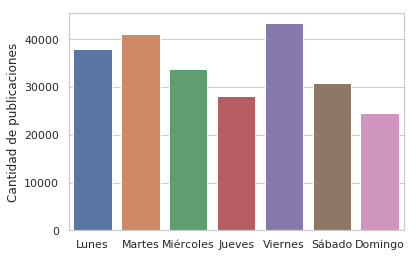

In [7]:
df['dia'] = df.fecha.dt.dayofweek
df3 = df.groupby(['dia'])['precio'].count().to_frame().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="dia", y="precio", data=df3)
plt.ylabel('Cantidad de publicaciones')
plt.xlabel('')
plt.xticks(np.arange(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

In [60]:
dfViviendas['año'] = dfViviendas.fecha.dt.year
df3 = dfViviendas.groupby(['tipodepropiedad', 'año'])['precio'].count().unstack().reset_index()
df3
#sns.barplot(x="año", y="precio", hue="tipodepropiedad", data=df3)

/home/martinkondra/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


año,tipodepropiedad,2012,2013,2014,2015,2016
0,Apartamento,5071.00,6716.00,9671.00,12780.00,23062.00
1,Casa,13728.00,19366.00,24208.00,29800.00,54518.00
2,Casa en condominio,2835.00,1960.00,3038.00,4095.00,7365.00
3,Duplex,nan,nan,nan,42.00,301.00


## Inconsistencia de datos: metros totales y metros cubiertos

0.2928808188621818

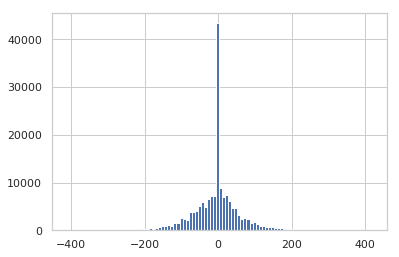

In [22]:
df['metrosdescubiertos'] = df['metrostotales']-df['metroscubiertos']
df[['metrostotales', 'metroscubiertos', 'metrosdescubiertos']]
plt.hist(df['metrosdescubiertos'].dropna(), bins=100)
#min(df['metrosdescubiertos'])
len(df.loc[df.metrosdescubiertos<0])/len(df)

## Frecuencia y densidad del precio. Distribución asimétrica positiva. (Muchas propiedades baratas)

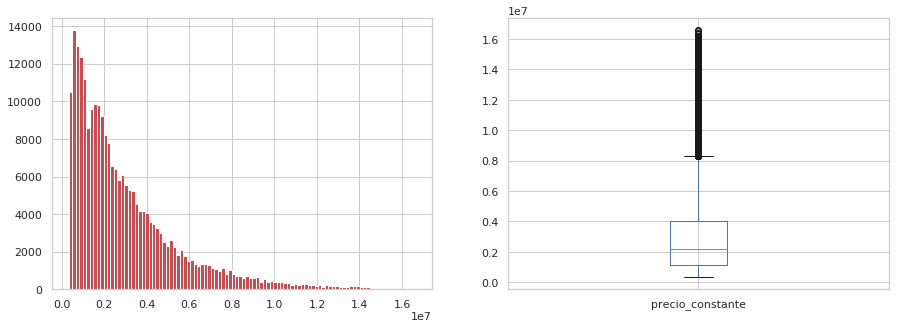

In [112]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
#axes[0].ticklabel_format(style = 'plain')
df['precio_constante'].hist(bins=100, ax=axes[0], color='r'); 
#np.log(df['precio']).hist(bins=80, ax=axes[0], color='g'); 
df['precio_constante'].plot(kind='box', ax=axes[1]);
plt.show()

## Correlación general entre variables

Text(0.5,1,'Matriz de correlaciones')

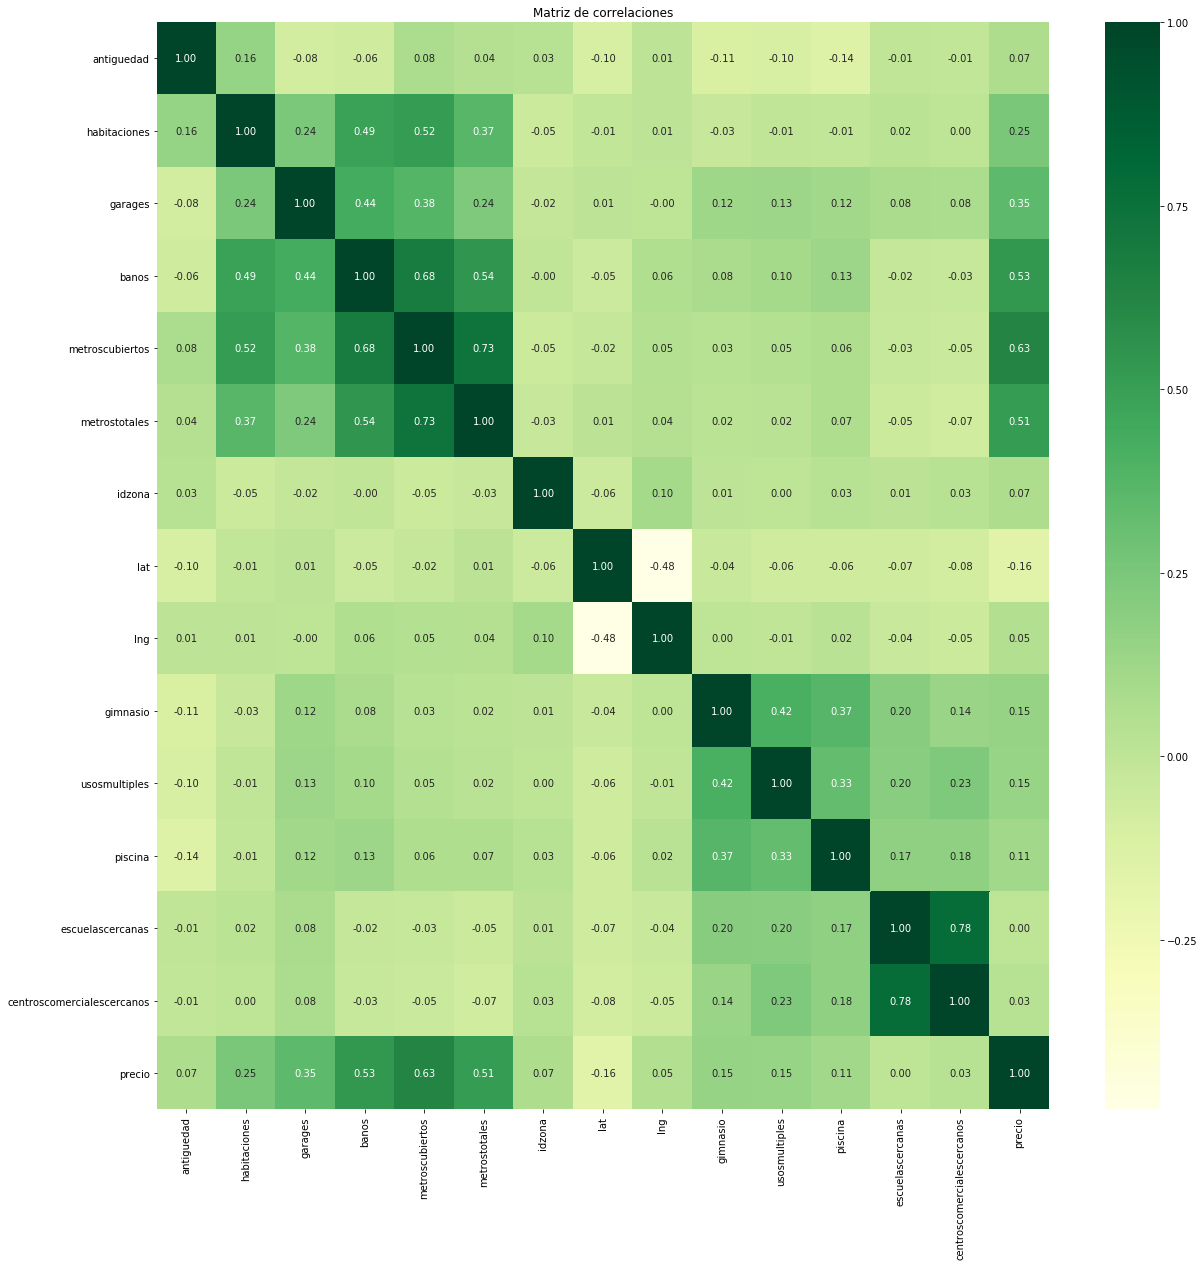

In [4]:
# Creamos una matriz de correlaciones solo para las variables cuantitativas.
#variables_cuantitativas = ['precio', 'metros', 'maxMetros', 'metrostotales','metroscubiertos','banos','garages','habitaciones','antiguedad']
plt.figure(figsize=(20,20))
cm= df.corr()#df[variables_cuantitativas].corr()
hm = sns.heatmap(cm, annot=True, fmt='.2f', cmap="YlGn")
hm.set_title('Matriz de correlaciones')

In [9]:
pd.set_option('display.max_rows', 300)

cmabs = cm.abs()

s = cmabs.unstack()
so = s.sort_values(ascending=False)
so.head(200)

precio                      precio                       1.00
centroscomercialescercanos  centroscomercialescercanos   1.00
habitaciones                habitaciones                 1.00
garages                     garages                      1.00
banos                       banos                        1.00
metroscubiertos             metroscubiertos              1.00
metrostotales               metrostotales                1.00
idzona                      idzona                       1.00
lng                         lng                          1.00
gimnasio                    gimnasio                     1.00
usosmultiples               usosmultiples                1.00
piscina                     piscina                      1.00
escuelascercanas            escuelascercanas             1.00
lat                         lat                          1.00
antiguedad                  antiguedad                   1.00
centroscomercialescercanos  escuelascercanas             0.78
escuelas

## Cómo variaron las correlaciones de los principales predictores del tiempo año a año.

Text(138.5,0.5,'Variable')

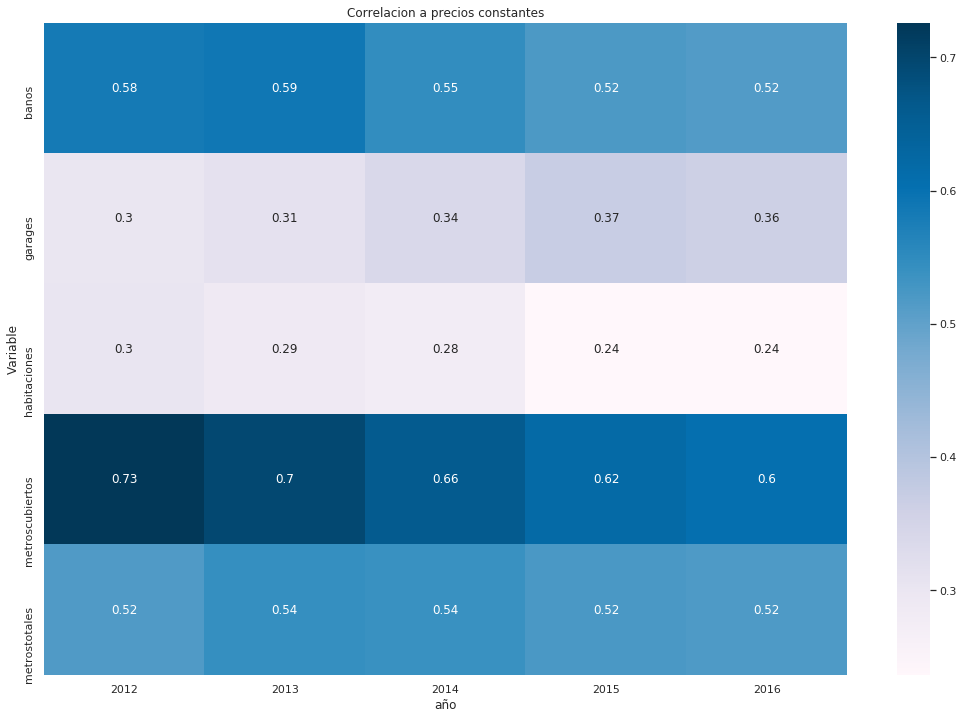

In [130]:
df['año'] = df.fecha.dt.year
corrTipo = df.groupby(['año']).corr()[['habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales']]
#corrTipo
stackedCorrTipo = corrTipo.stack().reset_index()
stackedCorrTipo = stackedCorrTipo.loc[stackedCorrTipo.level_1=='precio_constante']
stackedCorrTipo.columns = stackedCorrTipo.columns.map(str)
#stackedCorrTipo.sort_values(by='0', ascending=False)
##stackedCorrTipo.columns = stackedCorrTipo.columns.map(str)
stackedCorrTipo


# Heatmap by Genre and Year
pivoted = pd.pivot_table(stackedCorrTipo,values='0',columns='año', index='level_2')
pivoted
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(pivoted, cmap='PuBu', annot=True);
plt.title('Correlacion a precios constantes')
plt.ylabel('Variable')

## Cómo varía el precio de las propiedades en función de dónde se encuentran geográficamente.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

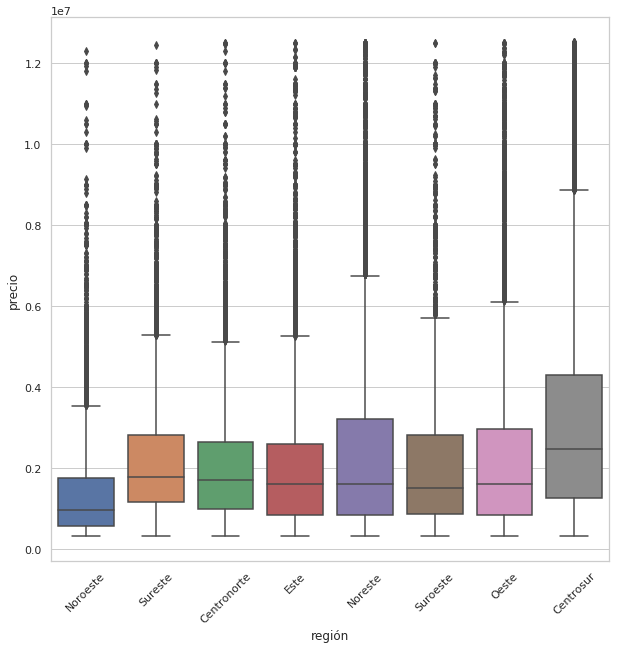

In [30]:
df['precioPorM2'] = df['precio_constante']/df['metrostotales']
categories = df.groupby('región').agg({'precioPorM2':'mean'}).sort_values(by='precioPorM2').index.tolist()
#categories = df.groupby('región').agg({'precio':'mean'}).sort_values(by='precio').index.tolist()

plt.figure(figsize=(10, 10))
sns.boxplot(df['región'], df['precio'], order=categories)
#plt.ylim(0,60000)
plt.xticks(rotation=45)

In [14]:
df

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,región,mes-año
0,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00,Centrosur,2015-08
1,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00,Centrosur,2013-06
2,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,1.00,...,-99.15,2014-03-18,0.00,0.00,0.00,0.00,1.00,1100000.00,Centrosur,2014-03
3,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.00,nan,0.00,nan,...,-99.15,2015-03-31,0.00,0.00,0.00,0.00,0.00,3000000.00,Centrosur,2015-03
4,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Apartamento,Pazaje Santa Cruz,Benito Juárez,Distrito Federal,5.00,3.00,2.00,nan,...,nan,2016-10-30,0.00,0.00,0.00,1.00,1.00,4750000.00,Centrosur,2016-10
5,NaN,"hermosa casa remodelada, con acabados de lujo,...",Casa en condominio,PASEO DE LOS LAURELES,Miguel Hidalgo,Distrito Federal,18.00,3.00,3.00,3.00,...,nan,2012-03-07,0.00,0.00,0.00,0.00,0.00,10800000.00,Centrosur,2012-03
6,casa en venta en tlalpan,"hermosa residencia con acabados de lujo, ¡opor...",Casa,Galeana,Tlalpan,Distrito Federal,2.00,3.00,2.00,3.00,...,-99.20,2012-04-18,0.00,0.00,0.00,1.00,1.00,3100000.00,Centrosur,2012-04
7,"casa en venta en agrícola oriental, iztacalco",<p>casa duplex (el primer nivel es el que se e...,Casa,Sur 16,Iztacalco,Distrito Federal,16.00,3.00,1.00,2.00,...,-99.13,2013-01-03,0.00,0.00,0.00,1.00,1.00,1200000.00,Centrosur,2013-01
8,excelentes departamentos con exclente ubicación,"1 pb, 2 primer piso, 2 segundo piso. cada depa...",Apartamento,Jesús Carranza No. 55,Cuauhtémoc,Distrito Federal,20.00,2.00,0.00,1.00,...,nan,2015-03-27,0.00,0.00,0.00,0.00,0.00,680000.00,Centrosur,2015-03
9,NaN,"departamento nuevo, 98m2 ,interior, 2 recamara...",Apartamento,ILLINOIS 31 602,Benito Juárez,Distrito Federal,0.00,2.00,2.00,2.00,...,-99.18,2012-10-16,0.00,0.00,0.00,0.00,0.00,2100000.00,Centrosur,2012-10


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
antiguedad,196394.00,8.12,9.55,0.00,0.00,5.00,10.00,80.00
habitaciones,217396.00,2.90,0.90,1.00,2.00,3.00,3.00,10.00
garages,202153.00,1.55,0.85,0.00,1.00,2.00,2.00,3.00
banos,213700.00,2.13,0.91,1.00,1.00,2.00,3.00,4.00
metroscubiertos,222473.00,173.99,98.15,15.00,90.00,153.00,240.00,439.00
metrostotales,188424.00,176.74,94.43,15.00,102.00,155.00,238.00,439.00
idzona,211379.00,2423467.82,10567938.36,22.00,24890.00,56383.00,87838.00,50003999.00
lat,116475.00,20.70,3.14,-100.89,19.36,19.54,20.74,83.03
lng,116475.00,-99.51,9.75,-125.86,-100.98,-99.24,-99.13,121.04
gimnasio,239845.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00


# Metros totales y metros cubiertos

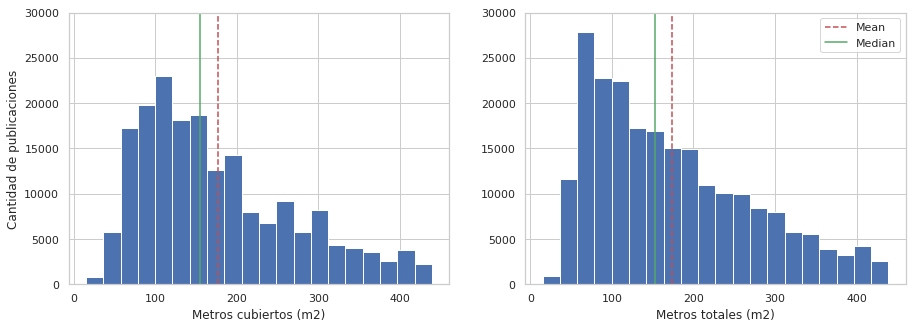

In [50]:
bins = 20
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.hist(df['metrostotales'].dropna(), bins=bins)
mean=df['metrostotales'].mean()
median=df['metrostotales'].median()
ax0.axvline(mean, color='r', linestyle='--')
ax0.axvline(median, color='g', linestyle='-')
ax0.set_xlabel('Metros cubiertos (m2)')
ax0.set_ylabel('Cantidad de publicaciones')
ax0.set_ylim(0,30000)

ax1.hist(df['metroscubiertos'].dropna(), bins=bins)
mean=df['metroscubiertos'].mean()
median=df['metroscubiertos'].median()
ax1.axvline(mean, color='r', linestyle='--')
ax1.axvline(median, color='g', linestyle='-')
ax1.set_xlabel('Metros totales (m2)')
ax1.set_ylim(0,30000)
plt.legend({'Mean':mean,'Median':median})

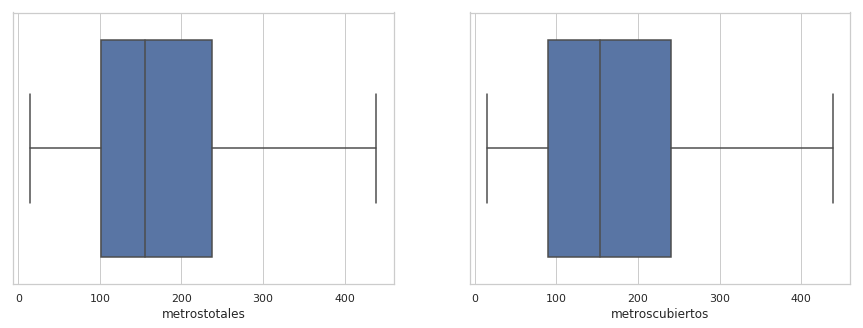

In [35]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(df['metrostotales'], ax=ax0)
sns.boxplot(df['metroscubiertos'], ax=ax1)


In [36]:
20*.005

0.1